In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil import parser
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
import matplotlib.dates as mdates
import statsmodels.api as sm

In [43]:
#Loading data:
data = pd.read_csv ('/Users/fan/Desktop/ML Project/nasdq.csv')
data.drop(columns=['InterestRate','ExchangeRate','VIX','TEDSpread','EFFR','Gold','Oil'],inplace = True)

In [44]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date',inplace = True)

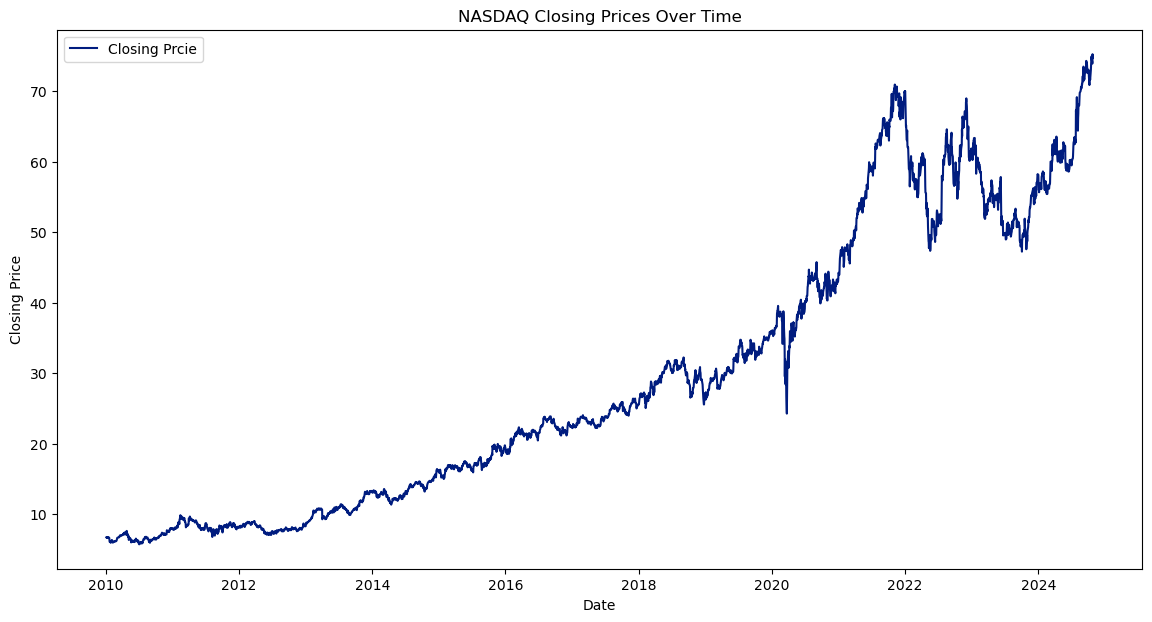

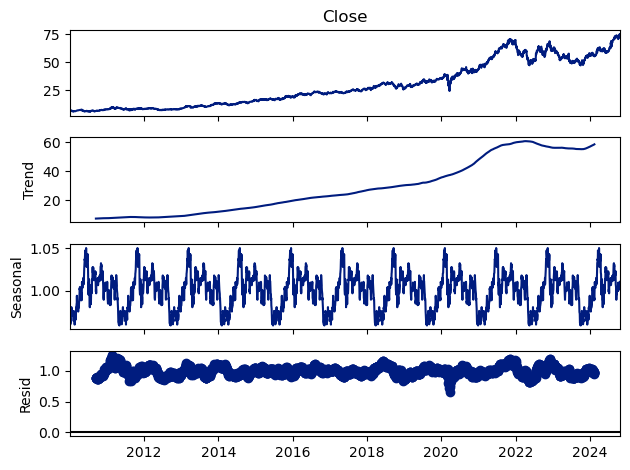

In [45]:
# Plotting the Closing Price:
plt.style.use('seaborn-v0_8-dark-palette')
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Closing Prcie')
plt.title('NASDAQ Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.savefig('Closig Prices Over Time')
plt.show()

# Seasonal decomposition:
decomposition = seasonal_decompose(data["Close"],model= 'multiplicative', period=365)
decomposition.plot()
plt.savefig('Seasonal Decomposition')
plt.show()

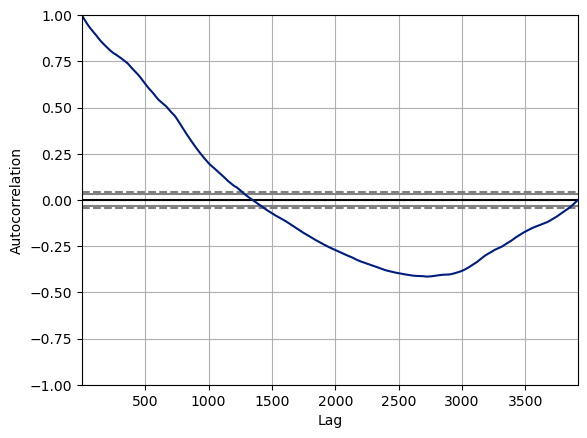

In [46]:
autocorrelation_plot(data["Close"])
plt.show()

In [47]:
# Check for the stationarity:
result = adfuller(data["Close"])
print(f"ADF Statistic:{result[0]}")
print(f"p-value:{result[1]}")

ADF Statistic:0.697593202765258
p-value:0.9897897152652165


In [48]:
if result[1] > 0.05:  
    data["Close"] = data["Close"].diff().dropna()
result = adfuller(data["Close"].dropna())
stationarity_interpretation = "Stationary" if result[1] < 0.05 else "Non-Stationary"

print(f"ADF Statistic after differencing: {result[0]}")
print(f"p-value after differencing: {result[1]}")
print(f"Interpretation: The series is {stationarity_interpretation}.")

ADF Statistic after differencing: -12.24080282653423
p-value after differencing: 1.0036164128991897e-22
Interpretation: The series is Stationary.


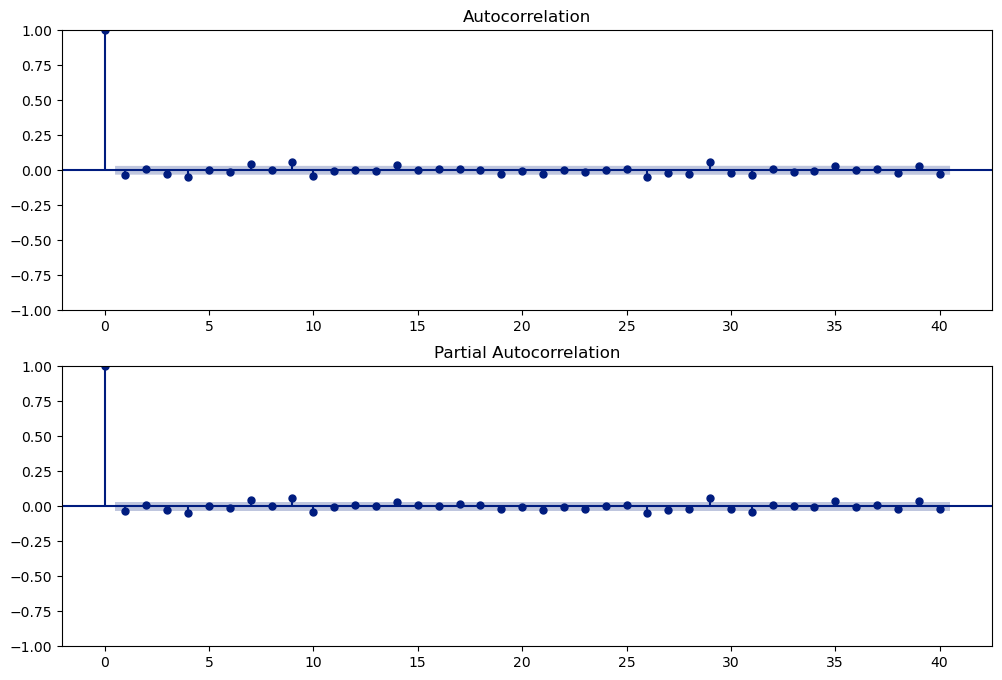

In [49]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data["Close"].dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data["Close"].dropna(), lags=40, ax=ax2)

In [50]:
# If the statistic is close to 0, it indicates that there may be positive autocorrelation.
# If the statistic is close to 4, it indicates that there may be negative autocorrelation.
# Here, the statistic is 1.999, which is very close to 2, indicating that the model residuals are basically free of significant autocorrelation.
dw_stat = sm.stats.durbin_watson(arma_mod10.resid.values)
print(dw_stat)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax = arma_mod10.resid.plot(ax=ax)

NameError: name 'arma_mod10' is not defined

/var/folders/_l/kh0wpml5791d6wbxn1xx0b500000gn/T/ipykernel_11744/1780199200.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted=-0.540251989887748, expected=-0.7099990844726562
predicted=-0.7464788672024054, expected=0.22999954223632812
predicted=-0.25983391130876443, expected=1.1299972534179688
predicted=0.6617266708165012, expected=0.0
predicted=0.5883506498062893, expected=-0.3599967956542969
predicted=-0.1727942351290643, expected=0.6399993896484375
predicted=0.11981117935018182, expected=0.020000457763671875
predicted=0.3425555657577028, expected=-0.0800018310546875
predicted=-0.027991499161592874, expected=0.029998779296875
predicted=-0.027211987243899727, expected=-0.6299972534179688
predicted=-0.28670994902566926, expected=0.3899993896484375
predicted=-0.14081453338580707, expected=0.29000091552734375
predicted=0.34201411755996514, expected=0.09999847412109375
predicted=0.1988235432810241, expected=0.1399993896484375
predicted=0.11919417409000675, expected=-1.05999755859375
predicted=-0.43582264686933536, expected=-0.5400009155273438
predicted=-0.8104361227810061, expected=-0.6800003051757812


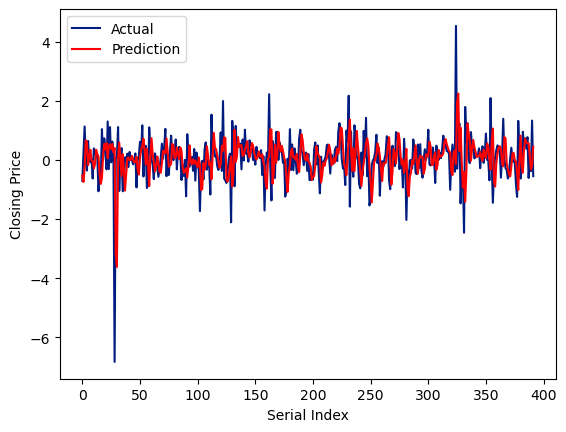

In [53]:
X = data['Close']
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# Walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print(f'predicted={yhat}, expected={obs}')
# Evaluate forecasts
mse = mean_squared_error(test, predictions)
print(f'MSE:{rmse}')
# Plot forecasts against actual outcomes
test_list = [ e for e in test]
plt.plot(test_list, label = "Actual")
plt.plot(predictions, color='red', label = "Prediction")
plt.xlabel("Serial Index")
plt.ylabel("Closing Price")
plt.legend()
plt.show()